In [84]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
import cv2

# https://scikit-image.org/docs/stable/auto_examples/edges/plot_circular_elliptical_hough_transform.html


# Load picture and detect edges
image = cv2.imread('screenshot5.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = img_as_ubyte(image)
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)

# Detect two radii
hough_radii = np.arange(23, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=5)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 3))
gray = image
image = color.gray2rgb(image)
origimage = image
PRECISIONY = 30
PRECISIONX = 50
precisey = [y//PRECISIONY for y in cy]
precisex = [x//PRECISIONX for x in cx]

#Xs should line up, Ys should not.
xs = []
ys = []
rs = []
for center_y, center_x, radius in zip(cy, cx, radii):
    myy = center_y//PRECISIONY
    myx = center_x//PRECISIONX
    if(precisey.count(myy) == 1):
        if(precisex.count(myx) != 1):
            circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
            image[circy, circx] = (220, 20, 20)
            xs.append(center_x)
            ys.append(center_y)
            rs.append(radius)
    else:
        precisey.remove(myy)
#assert len(xs)==2==len(ys)

#assert len(xs)==len(ys)==len(rs)==2

dbx, dby, dbr = xs[0], ys[0], rs[0]
hx, hy, hr = xs[1], ys[1], rs[0]
if(hy < dby):
    dbx, dby, dbr, hx, hy, hr = hx, hy, hr, dbx, dby, dbr
handle = 1

db = origimage[dby-dbr:dby+dbr, dbx-dbr:dbx+dbr]
h = gray[hy-hr:hy+hr, hx-hr:hx+hr]

hlx = len(h[0])
hly = len(h)
print(hlx,hly)
h = h[hly//4:3*hly//4, hlx//4:3*hlx//4]

h = canny(h, sigma=2.5, low_threshold=2, high_threshold=3)
h = np.array(h, dtype='uint8')
#h = color.gray2rgb(h)

ret, thresh = cv2.threshold(h,0,255,cv2.THRESH_BINARY)
contours,hier = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

# then apply fitline() function
[vx,vy,x,y] = cv2.fitLine(cnt,cv2.DIST_L2,0,0.01,0.01)

# Now find two extreme points on the line to draw line
lefty = int((-x*vy/vx) + y)
righty = int(((h.shape[1]-x)*vy/vx)+y)


plt.imshow(h)
plt.show()

50 50


C:\Users\pytho\AppData\Local\Temp\ipykernel_16436\3526720886.py:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lefty = int((-x*vy/vx) + y)
C:\Users\pytho\AppData\Local\Temp\ipykernel_16436\3526720886.py:86: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  righty = int(((h.shape[1]-x)*vy/vx)+y)


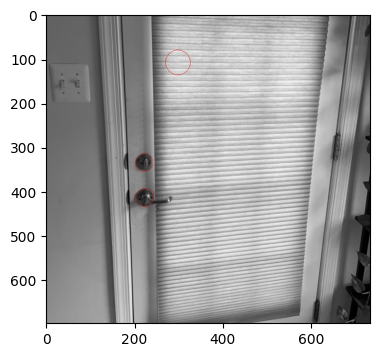

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
import cv2

# https://scikit-image.org/docs/stable/auto_examples/edges/plot_circular_elliptical_hough_transform.html


# Load picture and detect edges
image = cv2.imread('screenshot.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(image, 10, 50)


# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()